In [2]:
#import libraries
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt


In [33]:
import sklearn as sl

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
#load training set
train = pd.read_csv("train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#load testing set
test = pd.read_csv("test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# number of rows in training set
number_of_rows = len(train)
number_of_rows

42000

In [38]:
# number of each digit in trainig set
counts = train.groupby(['label'])['label'].count()
counts

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

There are roughly the same number of each digit, so it id a good data frame to do classification

In [41]:
#Training set with only pixels
train_pixels = train.drop(['label'], axis=1)
train_pixels.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Training label
train_label = train['label']
train_label.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

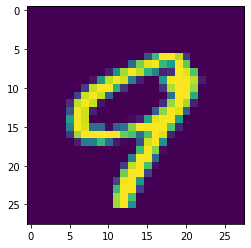

In [53]:
#show the 100th image of training set
one_hundredth_row = train_pixels.iloc[100].array
one_hundredth_matrix = first_row.reshape((28, 28))
one_hundredth_image = plt.imshow(one_hundredth_matrix)

In [55]:
# See if the 100th label matches the image
one_hundredth_label = train_label.iloc[100]
one_hundredth_label

9

In [ ]:
# Standardize the data to make their mean 0 and standard deviation 1

In [40]:
#model specification for K-nearest neighbors classification
knn_spec = KNeighborsClassifier(n_neighbors=5)